In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import matplotlib.cm as cm
import math

In [3]:
suumo = pd.read_csv('SuumoTokyoShaped20221018.csv')
suumo

カテゴリ                       建物名          経度         緯度 都道府県  市区町村  \
0        賃貸アパート                   プチ・ボヌール  139.726883  35.554230  東京都   大田区   
1        賃貸一戸建て                      荒川戸建  139.783234  35.737568  東京都   荒川区   
2        賃貸一戸建て                      荒川戸建  139.783234  35.737568  東京都   荒川区   
3       賃貸マンション              ティモーネ上野の森ノース  139.780899  35.726601  東京都   荒川区   
4        賃貸アパート   東京メトロ日比谷線 三ノ輪駅 3階建 築13年  139.795654  35.733616  東京都   荒川区   
...         ...                       ...         ...        ...  ...   ...   
156938  賃貸マンション                   メゾンスギモト  139.892426  35.720993  東京都  江戸川区   
156939  賃貸マンション                      大場ビル  139.880020  35.700130  東京都  江戸川区   
156940   賃貸一戸建て                      中澤貸家  139.902374  35.685436  東京都  江戸川区   
156941  賃貸マンション  東京メトロ副都心線 雑司が谷駅 7階建 築37年  139.716156  35.715145  東京都   豊島区   
156942   賃貸アパート                    ハイツ南大井  139.734222  35.596874  東京都   品川区   

       市区町村以下       経度(区)      緯度(区)         路線  ... 地下  階数    階    賃料    管理費  \
0        南蒲田３  139.716293  35.561337      京急空港線  ...  0   2  2.0  14.8   5000   
1         荒川２  139.783615  35.735130  東京メトロ千代田線  ...  0   3  3.0  19.5      0   
2         荒川２  139.783615  35.735130  東京メトロ千代田線  ...  0   3  3.0  19.5      0   
3       東日暮里４  139.783615  35.735130      ＪＲ山手線  ...  0  11  2.0  15.2  10000   
4        南千住５  139.783615  35.735130  東京メトロ日比谷線  ...  0   3  3.0  11.3   2000   
...       ...         ...        ...        ...  ... ..  ..  ...   ...    ...   
156938   東小岩１  139.867920  35.706589      ＪＲ総武線  ...  0   3  3.0   8.5      0   
156939  西一之江２  139.867920  35.706589      都営新宿線  ...  0   3  2.0   8.6   4000   
156940   江戸川２  139.867920  35.706589      都営新宿線  ...  0   2  2.0   8.4      0   
156941    高田１  139.717392  35.725555  東京メトロ副都心線  ...  0   7  7.0   9.2   8000   
156942   南大井５  139.729767  35.608822       京急本線  ...  0   2  1.0   8.5   3000   

          敷金    礼金    間取り   専有面積  \
0       14.8  14.8   42DK  48.87   
1       39.0  19.5  3SLDK  97.95   
2       39.0  19.5  3SLDK  97.95   
3       15.2  15.2   2LDK  52.04   
4       11.3  11.3   1LDK  43.81   
...      ...   ...    ...    ...   
156938   8.5   8.5    2DK  40.00   
156939   0.0   0.0   2LDK  47.25   
156940  16.8   0.0     3K  52.87   
156941   9.2   9.2    1DK  26.04   
156942   8.5   8.5  ワンルーム  28.56   

                                                      url  
0       https://suumo.jp/chintai/jnc_000046696863/?bc=...  
1       https://suumo.jp/chintai/jnc_000076009318/?bc=...  
2       https://suumo.jp/chintai/jnc_000076047600/?bc=...  
3       https://suumo.jp/chintai/jnc_000077318759/?bc=...  
4       https://suumo.jp/chintai/jnc_000077330023/?bc=...  
...                                                   ...  
156938  https://suumo.jp/chintai/jnc_000069889741/?bc=...  
156939  https://suumo.jp/chintai/jnc_000019146531/?bc=...  
156940  https://suumo.jp/chintai/jnc_000070035188/?bc=...  
156941  https://suumo.jp/chintai/jnc_000074167859/?bc=...  
156942  https://suumo.jp/chintai/jnc_000043176296/?bc=...  

[156943 rows x 28 columns]

In [5]:
suumo.isnull().sum()

カテゴリ       0
建物名        0
経度         0
緯度         0
都道府県       0
市区町村       0
市区町村以下     0
経度(区)      0
緯度(区)      0
路線         0
駅          0
経度(駅)     66
緯度(駅)     66
歩          0
バス         0
車          0
築年数        0
地上         0
地下         0
階数         0
階          0
賃料         0
管理費        0
敷金         0
礼金         0
間取り        0
専有面積       0
url        0
dtype: int64

In [4]:
feature_name = [
    'カテゴリ',
    '建物名',
    '経度', 
    '緯度',
    '都道府県',
    '市区町村',
    '市区町村以下',
    '経度(区)',
    '緯度(区)',
    '路線',
    '駅',
    '経度(駅)',
    '緯度(駅)',
    '歩',
    'バス',
    '車',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '賃料',
    '管理費',
    '敷金',
    '礼金',
    '間取り',
    '専有面積',
    'url',
]

In [123]:
# 住所→緯度経度変換装置

import requests
import urllib

def translate_address_coordinates(address):
    makeUrl = "https://msearch.gsi.go.jp/address-search/AddressSearch?q="
    s_quote = urllib.parse.quote(address)
    response = requests.get(makeUrl + s_quote)
    return response.json()[0]["geometry"]["coordinates"]

In [125]:
koukyo = '東京都千代田区千代田1'
keido_k, ido_k = translate_address_coordinates(koukyo)

In [56]:
# 座標から距離を計算

def distance(keido1,ido1,keido2,ido2):
    # 出力は[m]
    r=6378137
    keido1 = math.radians(keido1)
    ido1 = math.radians(ido1)
    keido2 = math.radians(keido2)
    ido2 = math.radians(ido2)
    distance = r*np.arccos(round(np.sin(ido1)*np.sin(ido2)+np.cos(ido1)*np.cos(ido2)*np.cos(keido2-keido1),10))
    return distance

In [59]:
# 座標から距離を計算

keido1, ido1 = suumo.loc[0,['経度','緯度']]
keido2, ido2 = suumo.loc[150000,['経度','緯度']]

print(distance(keido1,ido1,keido2,ido2))

19015.628566997817


In [61]:
# 最寄駅からの距離[m]
suumo['最寄駅からの距離'] = 0

suumo.loc[~suumo['経度(駅)'].isnull(),'最寄駅からの距離'] = suumo[~suumo['経度(駅)'].isnull()].apply(lambda x: distance(x['経度'], x['緯度'], x['経度(駅)'], x['緯度(駅)']), axis=1)

In [127]:
# 皇居(都心？)からの距離[m]
suumo['皇居からの距離'] = 0

suumo['皇居からの距離'] = suumo.apply(lambda x: distance(x['経度'], x['緯度'], keido_k, ido_k), axis=1)

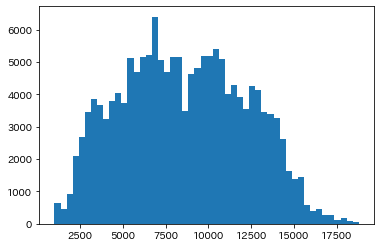

In [131]:
plt.hist(suumo['皇居からの距離'],bins=50)
plt.show()

In [81]:
suumo.sort_values('最寄駅からの距離').loc[suumo['最寄駅からの距離']==0,'最寄駅からの距離'].shape

(21278,)

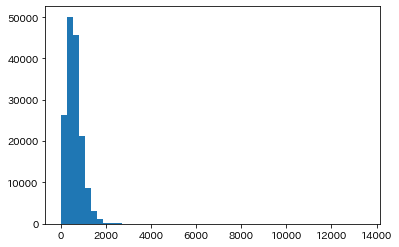

In [72]:
plt.hist(suumo['最寄駅からの距離'], bins=50)
plt.show()

<Figure size 576x576 with 0 Axes>

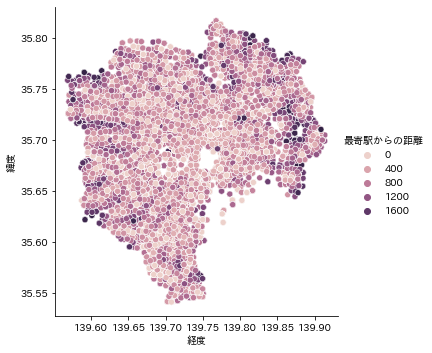

In [84]:
plt.figure(figsize=(8,8))
sns.relplot(data=suumo[(suumo['最寄駅からの距離']<=2000)&(~suumo['経度(駅)'].isnull())], x='経度', y='緯度', hue='最寄駅からの距離')
plt.show()

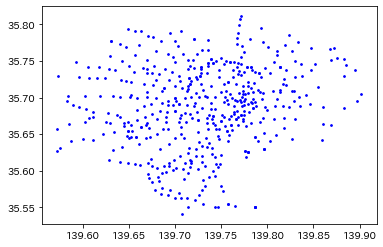

In [107]:
station_coordinates = pd.read_csv('station_coordinates.csv')
keido13957 = station_coordinates['経度'] >= 139.57

plt.scatter(station_coordinates.loc[keido13957,'経度'],station_coordinates.loc[keido13957,'緯度'], s=3, c='blue')

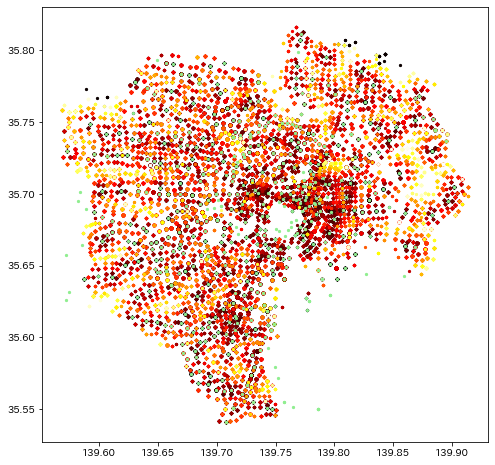

In [111]:
# 最寄駅からの距離
plt.figure(figsize=(8,8))
max = 2000
min = 0
scale = max - min
lower2000 = suumo['最寄駅からの距離'] <= 2000


for value in suumo['最寄駅からの距離'].unique():
    plt.scatter(suumo.loc[lower2000&(suumo['最寄駅からの距離']==value),'経度'],suumo.loc[lower2000&(suumo['最寄駅からの距離']==value),'緯度'],s=5,color=cm.hot(value/scale))
    
plt.scatter(station_coordinates.loc[keido13957,'経度'],station_coordinates.loc[keido13957,'緯度'], s=5, c='lightgreen')
plt.show()

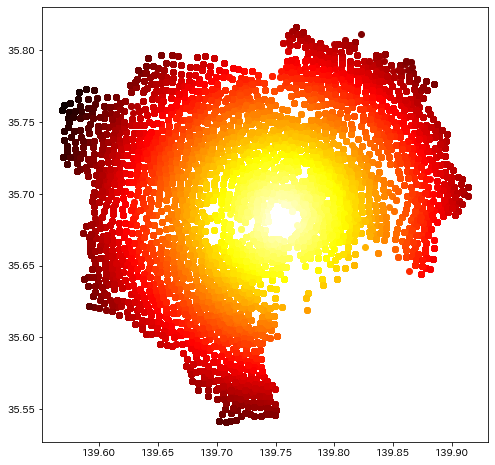

In [144]:
# 皇居からの距離
plt.figure(figsize=(8,8))
max = suumo['皇居からの距離'].max()

for value in suumo['皇居からの距離'].unique():
    plt.scatter(suumo.loc[suumo['皇居からの距離']==value,'経度'],suumo.loc[suumo['皇居からの距離']==value,'緯度'],color=cm.hot(1-(value/max)))

plt.show()

# 可視化

## 相関

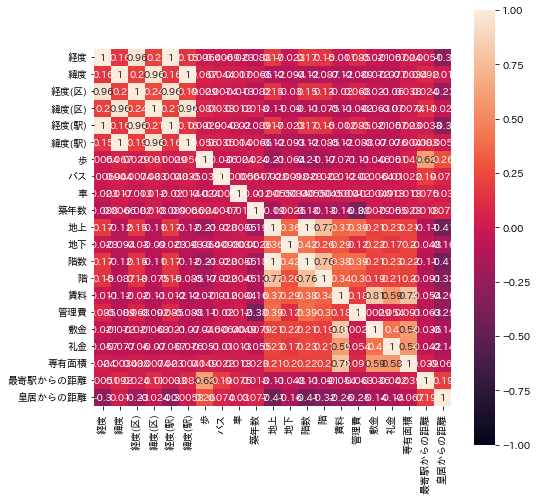

In [145]:
# 相関が高いのは
#（階：地上：地下：階数）
# (賃料：敷金：礼金：専有面積)
# (管理費：築年数)不
plt.figure(figsize=(8,8))
sns.heatmap(suumo.corr(),annot=True, vmax=1,vmin=-1, square=True)
plt.show()

In [146]:
suumo.corr()['賃料']

経度         -0.011320
緯度         -0.124035
経度(区)      -0.019845
緯度(区)      -0.112953
経度(駅)      -0.012087
緯度(駅)      -0.122015
歩          -0.070862
バス         -0.011691
車          -0.000403
築年数        -0.160251
地上          0.366811
地下          0.293706
階数          0.376052
階           0.341567
賃料          1.000000
管理費         0.184191
敷金          0.808201
礼金          0.591957
専有面積        0.779260
最寄駅からの距離   -0.053727
皇居からの距離    -0.264876
Name: 賃料, dtype: float64

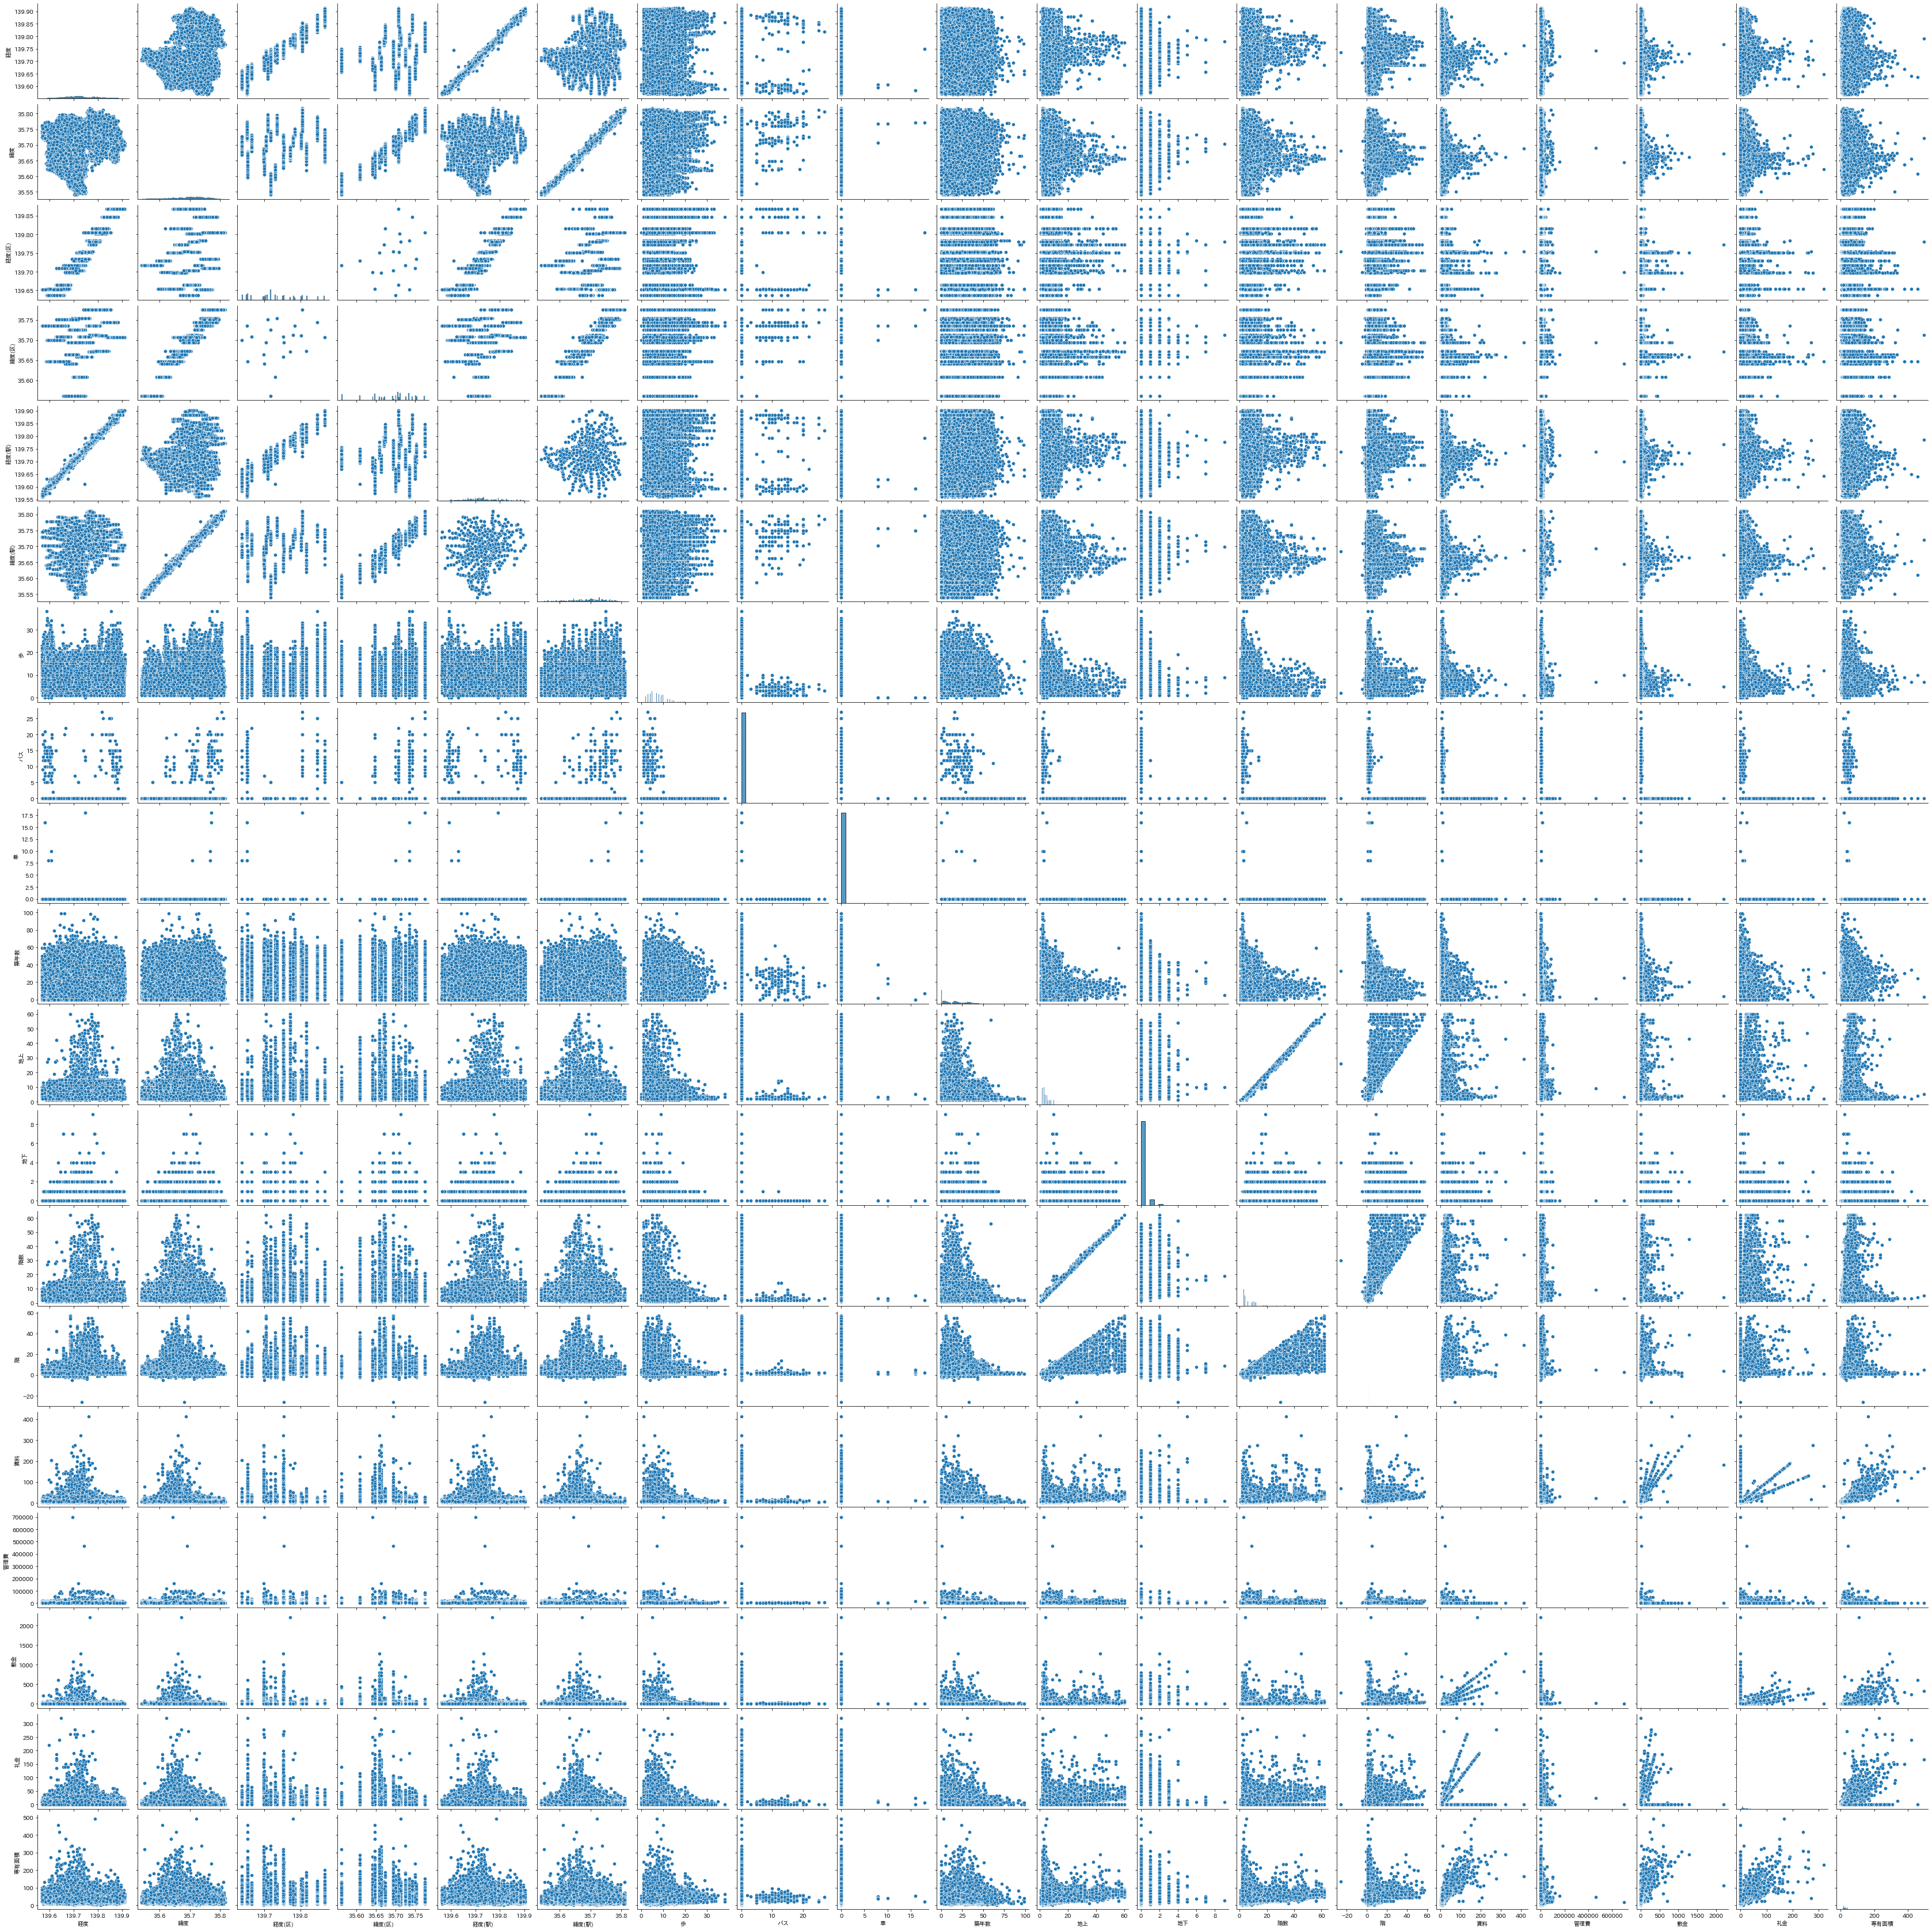

In [7]:
sns.pairplot(data=suumo)

## カテゴリ

In [29]:
# カテゴリは6種類
print(suumo['カテゴリ'].unique())

['賃貸アパート' '賃貸一戸建て' '賃貸マンション' '賃貸テラス・タウンハウス' '賃貸その他']


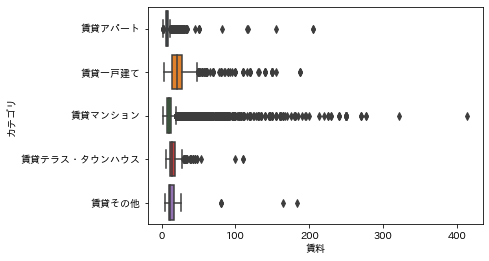

In [39]:
# カテゴリと賃料の関係
# スケールがでかすぎる
sns.boxplot(data=suumo, x='賃料', y='カテゴリ')
plt.show()

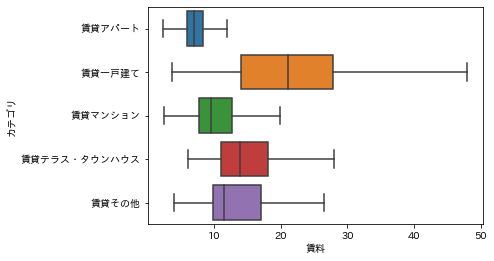

In [41]:
# 外れ値を外す
# 賃貸1戸建ては結構幅がある
# マンションは安めの層がメインだが小数のぶっ壊れが存在する
sns.boxplot(data=suumo, x='賃料', y='カテゴリ', sym='')
plt.show()

## 市区町村

In [5]:
# 東京23区のみ集計対象
print(suumo['市区町村'].unique())
print(suumo['市区町村'].unique().shape)

['大田区' '荒川区' '足立区' '葛飾区' '台東区' '目黒区' '江戸川区' '中野区' '板橋区' '豊島区' '墨田区' '千代田区'
 '中央区' '文京区' '江東区' '北区' '杉並区' '品川区' '練馬区' '渋谷区' '世田谷区' '新宿区' '港区']
(23,)


In [5]:
# 順番調整
def order_mean(group, by, index, asc):
    sort_describe = suumo.groupby(group).describe()[by].sort_values(index,ascending=asc)
    order = sort_describe.index
    return order

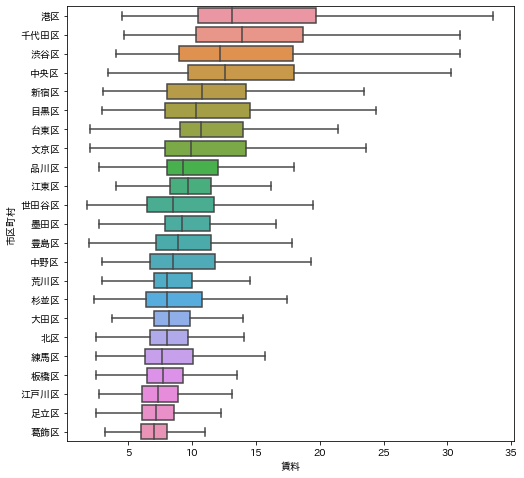

In [6]:
# 市区町村による賃料の違い
# 見づらいので外れ値は除去
# 幅が広くお高めな物件が結構ある：[千代田区、中央区、渋谷区、港区]
# 幅狭めで安め[葛飾区、足立区、板橋区、北区、練馬区、江戸川区]
order = order_mean('市区町村', '賃料','mean', False)
plt.figure(figsize=(8,8))
sns.boxplot(data=suumo, x='賃料', y='市区町村', order=order, sym='')
plt.show()

In [65]:
order_ku = order_mean('市区町村','賃料','mean',True)

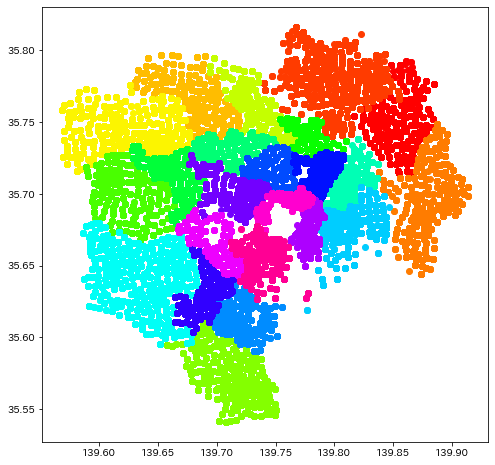

In [93]:
plt.figure(figsize=(8,8))
for id,ku in enumerate(order_ku):
    plt.scatter(suumo.loc[suumo['市区町村']==ku,'経度'],suumo.loc[suumo['市区町村']==ku,'緯度'],color=cm.hsv(id/(len(order_ku)+1)), alpha=1)

plt.show()

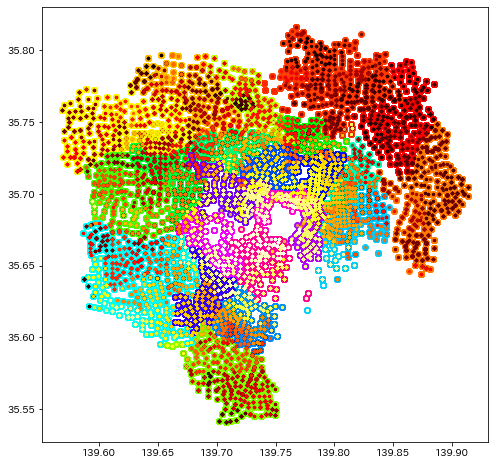

In [94]:
plt.figure(figsize=(8,8))
for id,ku in enumerate(order_ku):
    plt.scatter(suumo.loc[suumo['市区町村']==ku,'経度'],suumo.loc[suumo['市区町村']==ku,'緯度'],color=cm.hsv(id/(len(order_ku)+1)), alpha=1)
    
for id, station in enumerate(order_station):
    plt.scatter(suumo.loc[suumo['駅']==station,'経度'],suumo.loc[suumo['駅']==station,'緯度'],color=cm.hot(id/(len(order_station)+1)),s=5, alpha=0.6)

plt.show()

In [68]:
order_station = order_mean('駅','賃料','mean',True)

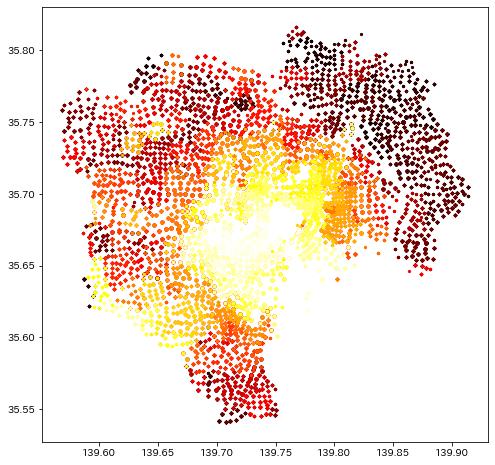

In [92]:
plt.figure(figsize=(8,8))
for id, station in enumerate(order_station):
    plt.scatter(suumo.loc[suumo['駅']==station,'経度'],suumo.loc[suumo['駅']==station,'緯度'],color=cm.hot(id/(len(order_station)+1)),s=5, alpha=1)
plt.show()

In [101]:
suumo[suumo['駅']=='豊島園駅'].sort_values('賃料',ascending=False)[['賃料']].mean()

賃料    12.039062
dtype: float64

## 路線

In [7]:
# 路線は64種類
print(suumo['路線'].unique().shape)
print(suumo['路線'].unique())

(64,)
['京急空港線' '東京メトロ千代田線' 'ＪＲ山手線' '東京メトロ日比谷線' '日暮里・舎人ライナー' 'ＪＲ常磐線' 'つくばエクスプレス'
 'ＪＲ高崎線' '都電荒川線' '東武大師線' '京成押上線' '東武伊勢崎線' '東急目黒線' '京成本線' 'ＪＲ総武線' '西武新宿線'
 '東武東上線' '都営新宿線' '東京メトロ東西線' '東急大井町線' '東急東横線' '都営三田線' '東京メトロ有楽町線' '西武池袋線'
 '都営大江戸線' 'ＪＲ中央線' '東京メトロ半蔵門線' 'ＪＲ京浜東北線' '東京メトロ丸ノ内線' '東京メトロ銀座線' 'ＪＲ埼京線'
 '都営浅草線' '東京メトロ南北線' '東京メトロ副都心線' '東急田園都市線' '京急本線' '京王線' 'ＪＲ総武線快速' '京王井の頭線'
 '新交通ゆりかもめ' '小田急線' 'ＪＲ京葉線' '東急池上線' '京王新線' 'ＪＲ横須賀線' '湘南新宿ライン宇須' 'りんかい線'
 'ＪＲ宇都宮線' '東急世田谷線' '京成金町線' '西武有楽町線' '東急多摩川線' '東武亀戸線' '北総線' '成田スカイアクセス'
 '東京モノレール' '埼玉高速鉄道' '西武豊島線' '東海道新幹線' 'ＪＲ東海道本線' '東北新幹線' '西武バス' '見沼代親水公園駅'
 '西武池袋線\u3000大泉学園駅']


In [118]:
order = suumo.groupby('路線').describe()['賃料'].sort_values('mean',ascending=False).index

In [122]:
order.sort_values().tolist()

['つくばエクスプレス',
 'りんかい線',
 '京急本線',
 '京急空港線',
 '京成押上線',
 '京成本線',
 '京成金町線',
 '京王井の頭線',
 '京王新線',
 '京王線',
 '北総線',
 '埼玉高速鉄道',
 '小田急線',
 '成田スカイアクセス',
 '新交通ゆりかもめ',
 '日暮里・舎人ライナー',
 '東京メトロ丸ノ内線',
 '東京メトロ副都心線',
 '東京メトロ千代田線',
 '東京メトロ半蔵門線',
 '東京メトロ南北線',
 '東京メトロ日比谷線',
 '東京メトロ有楽町線',
 '東京メトロ東西線',
 '東京メトロ銀座線',
 '東京モノレール',
 '東北新幹線',
 '東急世田谷線',
 '東急多摩川線',
 '東急大井町線',
 '東急東横線',
 '東急池上線',
 '東急田園都市線',
 '東急目黒線',
 '東武亀戸線',
 '東武伊勢崎線',
 '東武大師線',
 '東武東上線',
 '東海道新幹線',
 '湘南新宿ライン宇須',
 '西武バス',
 '西武新宿線',
 '西武有楽町線',
 '西武池袋線',
 '西武池袋線\u3000大泉学園駅',
 '西武豊島線',
 '見沼代親水公園駅',
 '都営三田線',
 '都営大江戸線',
 '都営新宿線',
 '都営浅草線',
 '都電荒川線',
 'ＪＲ中央線',
 'ＪＲ京浜東北線',
 'ＪＲ京葉線',
 'ＪＲ埼京線',
 'ＪＲ宇都宮線',
 'ＪＲ山手線',
 'ＪＲ常磐線',
 'ＪＲ東海道本線',
 'ＪＲ横須賀線',
 'ＪＲ総武線',
 'ＪＲ総武線快速',
 'ＪＲ高崎線']

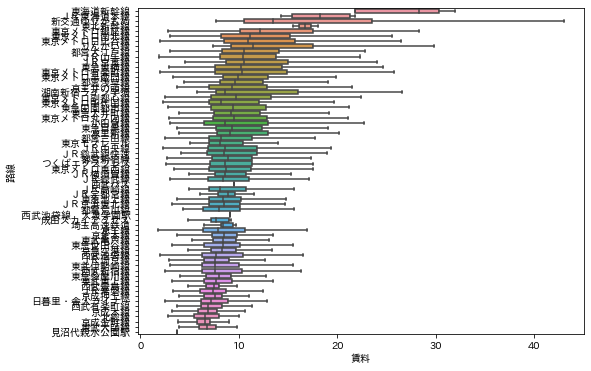

In [142]:
# 路線ごとの賃料
# 結構差があるような印象
order = order_mean('路線', '賃料','mean', False)
plt.figure(figsize=(8,6))
sns.boxplot(data=suumo, x='賃料', y='路線', order=order, sym='')
plt.show()

## 駅

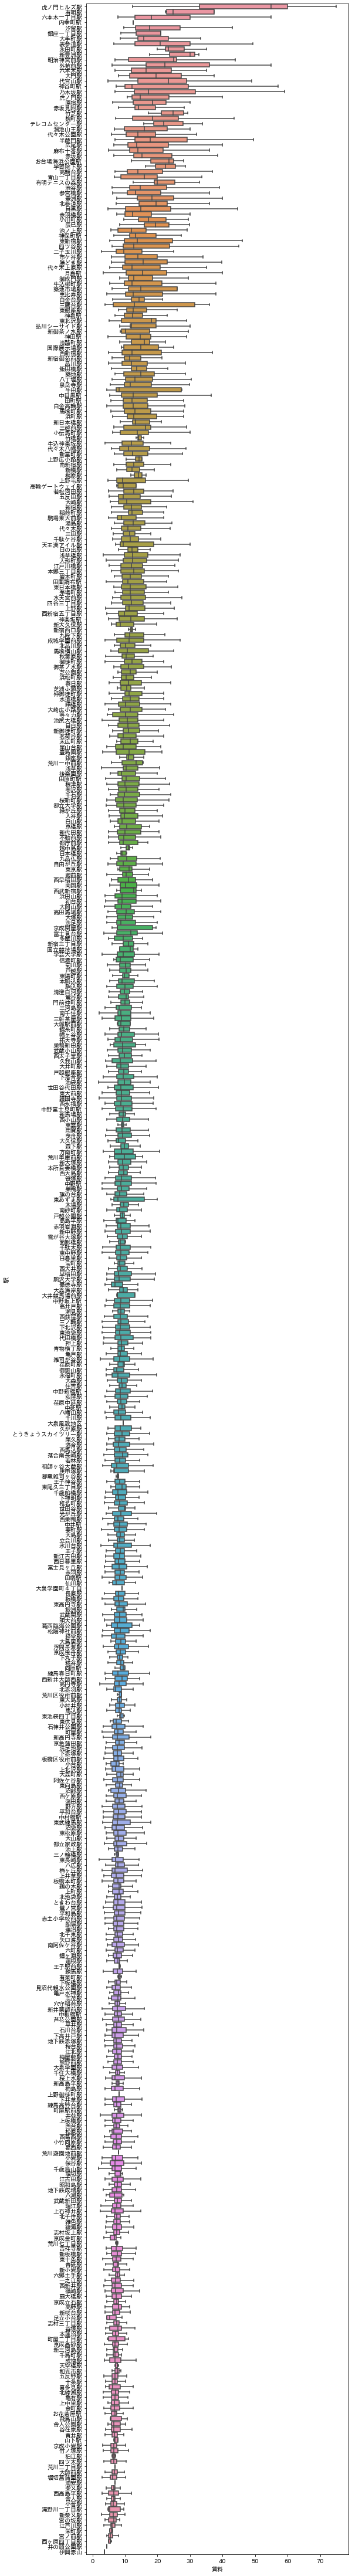

In [60]:
# 駅と賃料
order = order_mean('駅', '賃料','mean', False)
plt.figure(figsize=(8,80))
sns.boxplot(data=suumo, x='賃料', y='駅',order=order, sym='')
plt.show()

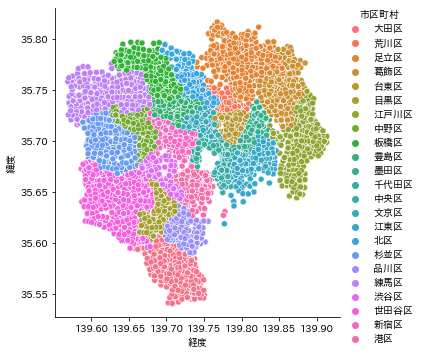

In [10]:
sns.relplot(data=suumo, x='経度', y='緯度', hue='市区町村')
plt.show()

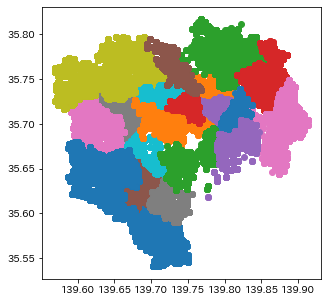

In [15]:
plt.figure(figsize=(5,5))
for ku in suumo['市区町村'].unique():
    plt.scatter(suumo.loc[suumo['市区町村']==ku,'経度'],suumo.loc[suumo['市区町村']==ku,'緯度'])
plt.show()

## 歩

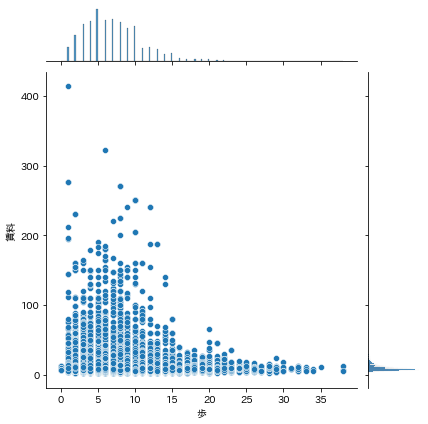

In [77]:
sns.jointplot(data=suumo, x='歩', y='賃料')
plt.show()

In [74]:
sns.relplot?

## バス

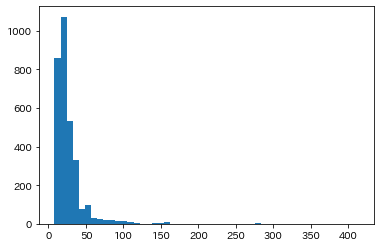

In [128]:
plt.hist(suumo[suumo['間取り'] == '3LDK']['賃料'],bins=50)
plt.show()

## 車

## 築年数

## 地上

## 地下

## 階数

## 階

## 賃料

## 管理費

## 敷金

## 礼金

## 専有面積